In [1]:
import pandas as pd 


                # We load and explore the data with the following commands:
                
 # save filepath to variable for easier access
city_file_path = 'C:/Users/adamd\Desktop/ESITH 2.0/MR fri/projets FRI/city.csv'#adress for train data 

 # read the data and store data in DataFrame titled melbourne_data
city_data = pd.read_csv(city_file_path) 


In [2]:
city_data.head()


,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0,31/01/12,Athens,37.97945,23.71622,672130,shop_1,kinder-cola,glass,500ml,0.96,13280
1,1,31/01/12,Athens,37.97945,23.71622,672130,shop_1,kinder-cola,plastic,1.5lt,2.86,6727
2,2,31/01/12,Athens,37.97945,23.71622,672130,shop_1,kinder-cola,can,330ml,0.87,9848
3,3,31/01/12,Athens,37.97945,23.71622,672130,shop_1,adult-cola,glass,500ml,1.00,20050
4,4,31/01/12,Athens,37.97945,23.71622,672130,shop_1,adult-cola,can,330ml,0.39,25696


In [3]:
city_data.tail()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
7555,7555,31/12/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,2.52,13760
7556,7556,31/12/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,2.18,16309
7557,7557,31/12/18,Patra,38.24444,21.73444,168034,shop_6,kinder-cola,can,330ml,0.85,24378
7558,7558,31/12/18,Thessaloniki,40.64361,22.93086,354290,shop_4,adult-cola,plastic,1.5lt,2.17,20691
7559,7559,31/12/18,Irakleion,35.32787,25.14341,137154,shop_2,adult-cola,glass,500ml,1.26,24615


In [4]:
city_data.describe()

,id,lat,long,pop,price,quantity
count,7560.00000,7501.000000,7501.000000,7560.000000,7560.000000,7560.000000
mean,3779.50000,38.300808,23.270191,355174.095238,1.196049,29421.715212
std,2182.52835,1.650503,1.087175,232441.012350,0.816838,17665.033867
min,0.00000,35.327870,21.734440,134219.000000,0.110000,2953.000000
25%,1889.75000,37.962450,22.417610,141732.000000,0.620000,16572.750000
50%,3779.50000,38.244440,22.930860,257501.500000,0.930000,25312.000000
75%,5669.25000,39.636890,23.716220,665102.000000,1.510000,37751.500000
max,7559.00000,40.643610,25.143410,672130.000000,4.790000,145287.000000


In [5]:

from sklearn.model_selection import train_test_split

# Read the data
data = pd.read_csv('C:/Users/adamd\Desktop/ESITH 2.0/MR fri/projets FRI/city.csv')

# Separate target from predictors
y = data.quantity
X = data.drop(['quantity'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)
                                                                
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [7]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
#XGBRegressor
#RandomForestRegressor

model = XGBRegressor(n_estimators=400, random_state=0)


In [8]:
from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)



[13:33:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 3637.3516076708597


In [9]:
print(preds)
print(y_valid.head())

[43407.117 18032.367 53533.242 ... 18138.213 41152.406  1664.775]
4202    30591
1670    10828
3537    62216
4670    16408
4934    46721
Name: quantity, dtype: int64


In [10]:

# Define the model
my_model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.1)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', my_model_2)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds2 = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds2)
print('MAE:', score)

[13:33:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 3265.2411673056386


In [11]:
print(preds2)
print(y_valid)

[40480.2    18533.129  54206.95   ... 18525.715  40956.84    1554.9552]
4202    30591
1670    10828
3537    62216
4670    16408
4934    46721
        ...  
5039    31658
3043    24817
3484    20161
6228    38149
4382     8010
Name: quantity, Length: 1512, dtype: int64


In [12]:
import numpy as np
np.mean(np.abs((y_valid - preds2) / y_valid)) * 100

13.498820909971219

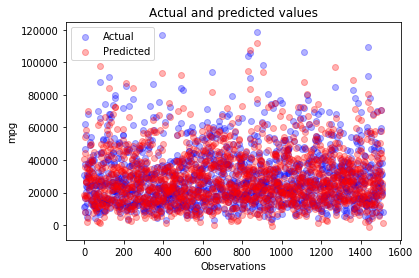

In [13]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_valid.size), y=y_valid, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, preds2.size), y=preds2, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()

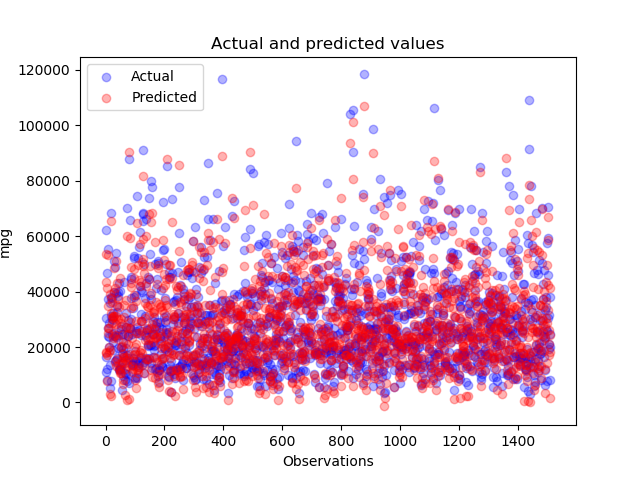

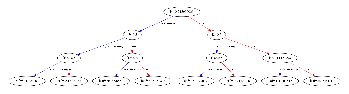

In [14]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
# plot single tree
plot_tree(model)
plt.show()

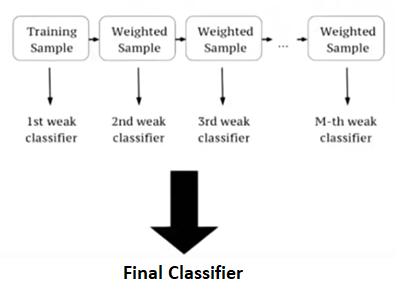

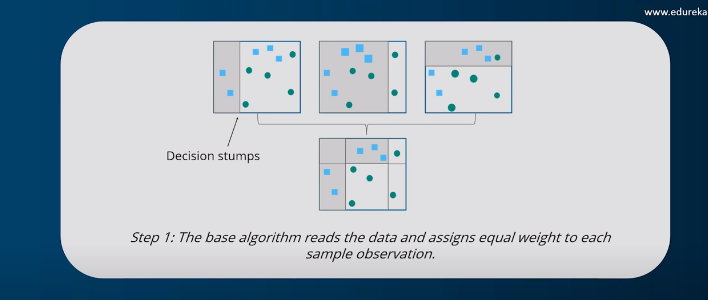

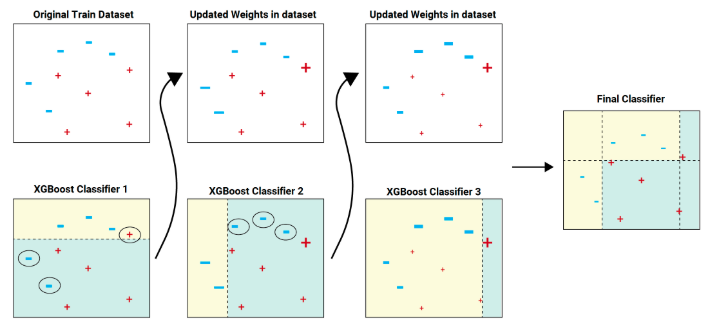


***************************** XGBoost tree in Python******************************


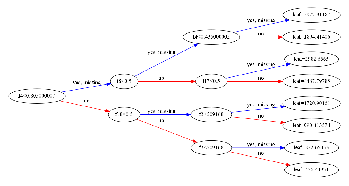

In [15]:
## How to visualise XGBoost tree in Python
## DataSet: skleran.datasets.load_breast_cancer()
def Snippet_186():
    print()
    print(format(' XGBoost tree in Python','*^82'))
    import warnings
    warnings.filterwarnings("ignore")

    # load libraries
    from sklearn import datasets
    from sklearn import metrics
    from xgboost import XGBClassifier, plot_tree
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt

    plt.style.use('ggplot')

   


   
    plot_tree(model, num_trees=5, rankdir='LR'); plt.show()
Snippet_186()

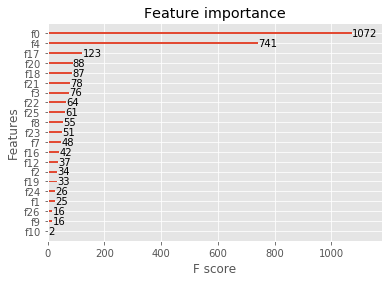

In [16]:
from xgboost import plot_importance
# Plot feature importance
plot_importance(model)